[![Roboflow Notebooks](https://ik.imagekit.io/roboflow/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# How to Train YOLOv8 Object Detection on a Custom Dataset

---

[![Roboflow](https://raw.githubusercontent.com/roboflow-ai/notebooks/main/assets/badges/roboflow-blogpost.svg)](https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset)
[![YouTube](https://badges.aleen42.com/src/youtube.svg)](https://youtu.be/wuZtUMEiKWY)
[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)

Ultralytics YOLOv8 is the latest version of the YOLO (You Only Look Once) object detection and image segmentation model developed by Ultralytics. The YOLOv8 model is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and image segmentation tasks. It can be trained on large datasets and is capable of running on a variety of hardware platforms, from CPUs to GPUs.

## ⚠️ Disclaimer

YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **27.01.2023** with version **YOLOv8.0.20**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

## Accompanying Blog Post

We recommend that you follow along in this notebook while reading the blog post on how to train YOLOv8 Object Detection, concurrently.

## Pro Tip: Use GPU Acceleration

If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`. This will ensure your notebook uses a GPU, which will significantly speed up model training times.

## Steps in this Tutorial

In this tutorial, we are going to cover:

- Before you start
- Install YOLOv8
- CLI Basics
- Inference with Pre-trained COCO Model
- Roboflow Universe
- Preparing a custom dataset
- Custom Training
- Validate Custom Model
- Inference with Custom Model

**Let's begin!**

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Tue Mar 14 14:19:14 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.65.01    Driver Version: 515.65.01    CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A10G         On   | 00000000:00:1E.0 Off |                    0 |
|  0%   29C    P0    60W / 300W |      0MiB / 23028MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/home/ec2-user/notebooks


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **27.01.2023** with version **YOLOv8.0.20**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.53

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.53 🚀 Python-3.9.13 torch-1.13.1+cu117 CUDA:0 (NVIDIA A10G, 22592MiB)
Setup complete ✅ (8 CPUs, 31.1 GB RAM, 44.0/45.0 GB disk)


In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -qe ultralytics

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics 

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://v8docs.ultralytics.com/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8x.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

In [ ]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [ ]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

In [ ]:
results[0].boxes.xyxy

In [ ]:
results[0].boxes.conf

In [ ]:
results[0].boxes.cls

## Roboflow Universe

Need data for your project? Before spending time on annotating, check out Roboflow Universe, a repository of more than 110,000 open-source datasets that you can use in your projects. You'll find datasets containing everything from annotated cracks in concrete to plant images with disease annotations.


[![Roboflow Universe](https://ik.imagekit.io/roboflow/notebooks/template/uni-banner-frame.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672878480290)](https://universe.roboflow.com/)



## Preparing a custom dataset

Building a custom dataset can be a painful process. It might take dozens or even hundreds of hours to collect images, label them, and export them in the proper format. Fortunately, Roboflow makes this process as straightforward and fast as possible. Let me show you how!

### Step 1: Creating project

Before you start, you need to create a Roboflow [account](https://app.roboflow.com/login). Once you do that, you can create a new project in the Roboflow [dashboard](https://app.roboflow.com/). Keep in mind to choose the right project type. In our case, Object Detection.

<div align="center">
  <img
    width="640"
    src="https://ik.imagekit.io/roboflow/preparing-custom-dataset-example/creating-project.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929799852"
  >
</div>

### Step 2: Uploading images

Next, add the data to your newly created project. You can do it via API or through our [web interface](https://docs.roboflow.com/adding-data/object-detection).

If you drag and drop a directory with a dataset in a supported format, the Roboflow dashboard will automatically read the images and annotations together. 

<div align="center">
  <img
    width="640"
    src="https://ik.imagekit.io/roboflow/preparing-custom-dataset-example/uploading-images.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929808290"
  >
</div>

### Step 3: Labeling

If you only have images, you can label them in [Roboflow Annotate](https://docs.roboflow.com/annotate).

<div align="center">
  <img
    width="640"
    src="https://user-images.githubusercontent.com/26109316/210901980-04861efd-dfc0-4a01-9373-13a36b5e1df4.gif"
  >
</div>

### Step 4: Generate new dataset version

Now that we have our images and annotations added, we can Generate a Dataset Version. When Generating a Version, you may elect to add preprocessing and augmentations. This step is completely optional, however, it can allow you to significantly improve the robustness of your model.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/generate-new-version.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1673003597834"
  >
</div>

### Step 5: Exporting dataset

Once the dataset version is generated, we have a hosted dataset we can load directly into our notebook for easy training. Click `Export` and select the `YOLO v5 PyTorch` dataset format.

<div align="center">
  <img
    width="640"
    src="https://ik.imagekit.io/roboflow/preparing-custom-dataset-example/export.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672943313709"
  >
</div>




In [8]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow==0.2.34

from roboflow import Roboflow
rf = Roboflow(api_key="")
project = rf.workspace("spicedfinal").project("deep-hockey")

mkdir: cannot create directory ‘/home/ec2-user/notebooks/datasets’: File exists
/home/ec2-user/notebooks/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 17.5 MB/s eta 0:00:00
  Attempting uninstall: roboflow
    Found existing installation: roboflow 0.2.32
    Uninstalling roboflow-0.2.32:
      Successfully uninstalled roboflow-0.2.32
loading Roboflow workspace...
loading Roboflow project...


In [9]:
dataset = project.version(16).download("yolov8")

Dependency ultralytics<=8.0.20 is required but found version=8.0.53, to fix: `pip install ultralytics<=8.0.20`

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Extracting Dataset Version Zip to deep-hockey-16 in yolov8:: 100%|██████████| 18244/18244 [00:20<00:00, 910.39it/s] 


## Custom Training

In [10]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=200 plots=True patience=20 save=True batch=48 line_thickness=2

/home/ec2-user/notebooks
Ultralytics YOLOv8.0.53 🚀 Python-3.9.13 torch-1.13.1+cu117 CUDA:0 (NVIDIA A10G, 22592MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/home/ec2-user/notebooks/datasets/deep-hockey-16/data.yaml, epochs=200, patience=20, batch=48, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=2, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, ke

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        580       2295      0.866      0.742      0.796      0.563

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     10/200      19.9G      0.964     0.6354      1.103        236        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        580       2295      0.856      0.782      0.819      0.575

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     11/200      19.9G     0.9331     0.6096      1.089        240        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        580       2295      0.905      0.761      0.833      0.588

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     12/200      19.9G     0.9021     0.5803      1.073        252        640: 1
          

     34/200      19.9G      0.645     0.3968     0.9493        194        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        580       2295      0.912      0.789      0.849      0.626

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     35/200      19.9G     0.6416     0.3981      0.949        258        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        580       2295      0.931      0.782      0.849      0.626

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     36/200      19.9G     0.6366     0.3939     0.9496        157        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        580       2295      0.918      0.787      0.851       0.63

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     37/20

     59/200      19.9G     0.5478     0.3385     0.9094        199        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        580       2295      0.915      0.805      0.861      0.639

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     60/200      19.9G     0.5407     0.3311     0.9052        275        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        580       2295      0.928      0.798      0.862       0.64

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     61/200      19.9G     0.5417     0.3328     0.9061        182        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        580       2295      0.924      0.803      0.867      0.643

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     62/20

     84/200      19.9G     0.4906      0.302     0.8846        209        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        580       2295      0.934       0.79      0.866      0.644

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     85/200      19.9G     0.4893     0.2987     0.8854        228        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        580       2295      0.933      0.791      0.866      0.643

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     86/200      19.9G     0.4878     0.2989     0.8838        187        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        580       2295      0.935      0.791      0.867      0.645

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     87/20

    109/200      19.9G     0.4476     0.2768     0.8678        219        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        580       2295      0.918      0.802      0.867      0.648

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
    110/200      19.9G     0.4432     0.2719     0.8656        249        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        580       2295      0.917        0.8      0.866      0.648

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
    111/200      19.9G     0.4395     0.2712     0.8673        217        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        580       2295      0.918      0.799      0.865      0.648

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
    112/20

In [11]:
!ls {HOME}/runs/detect/train4/

args.yaml
confusion_matrix.png
events.out.tfevents.1678803940.ip-172-31-47-223.eu-central-1.compute.internal.11571.0
F1_curve.png
labels_correlogram.jpg
labels.jpg
P_curve.png
PR_curve.png
R_curve.png
results.csv
results.png
train_batch0.jpg
train_batch1.jpg
train_batch2.jpg
val_batch0_labels.jpg
val_batch0_pred.jpg
val_batch1_labels.jpg
val_batch1_pred.jpg
val_batch2_labels.jpg
val_batch2_pred.jpg
weights


/home/ec2-user/notebooks


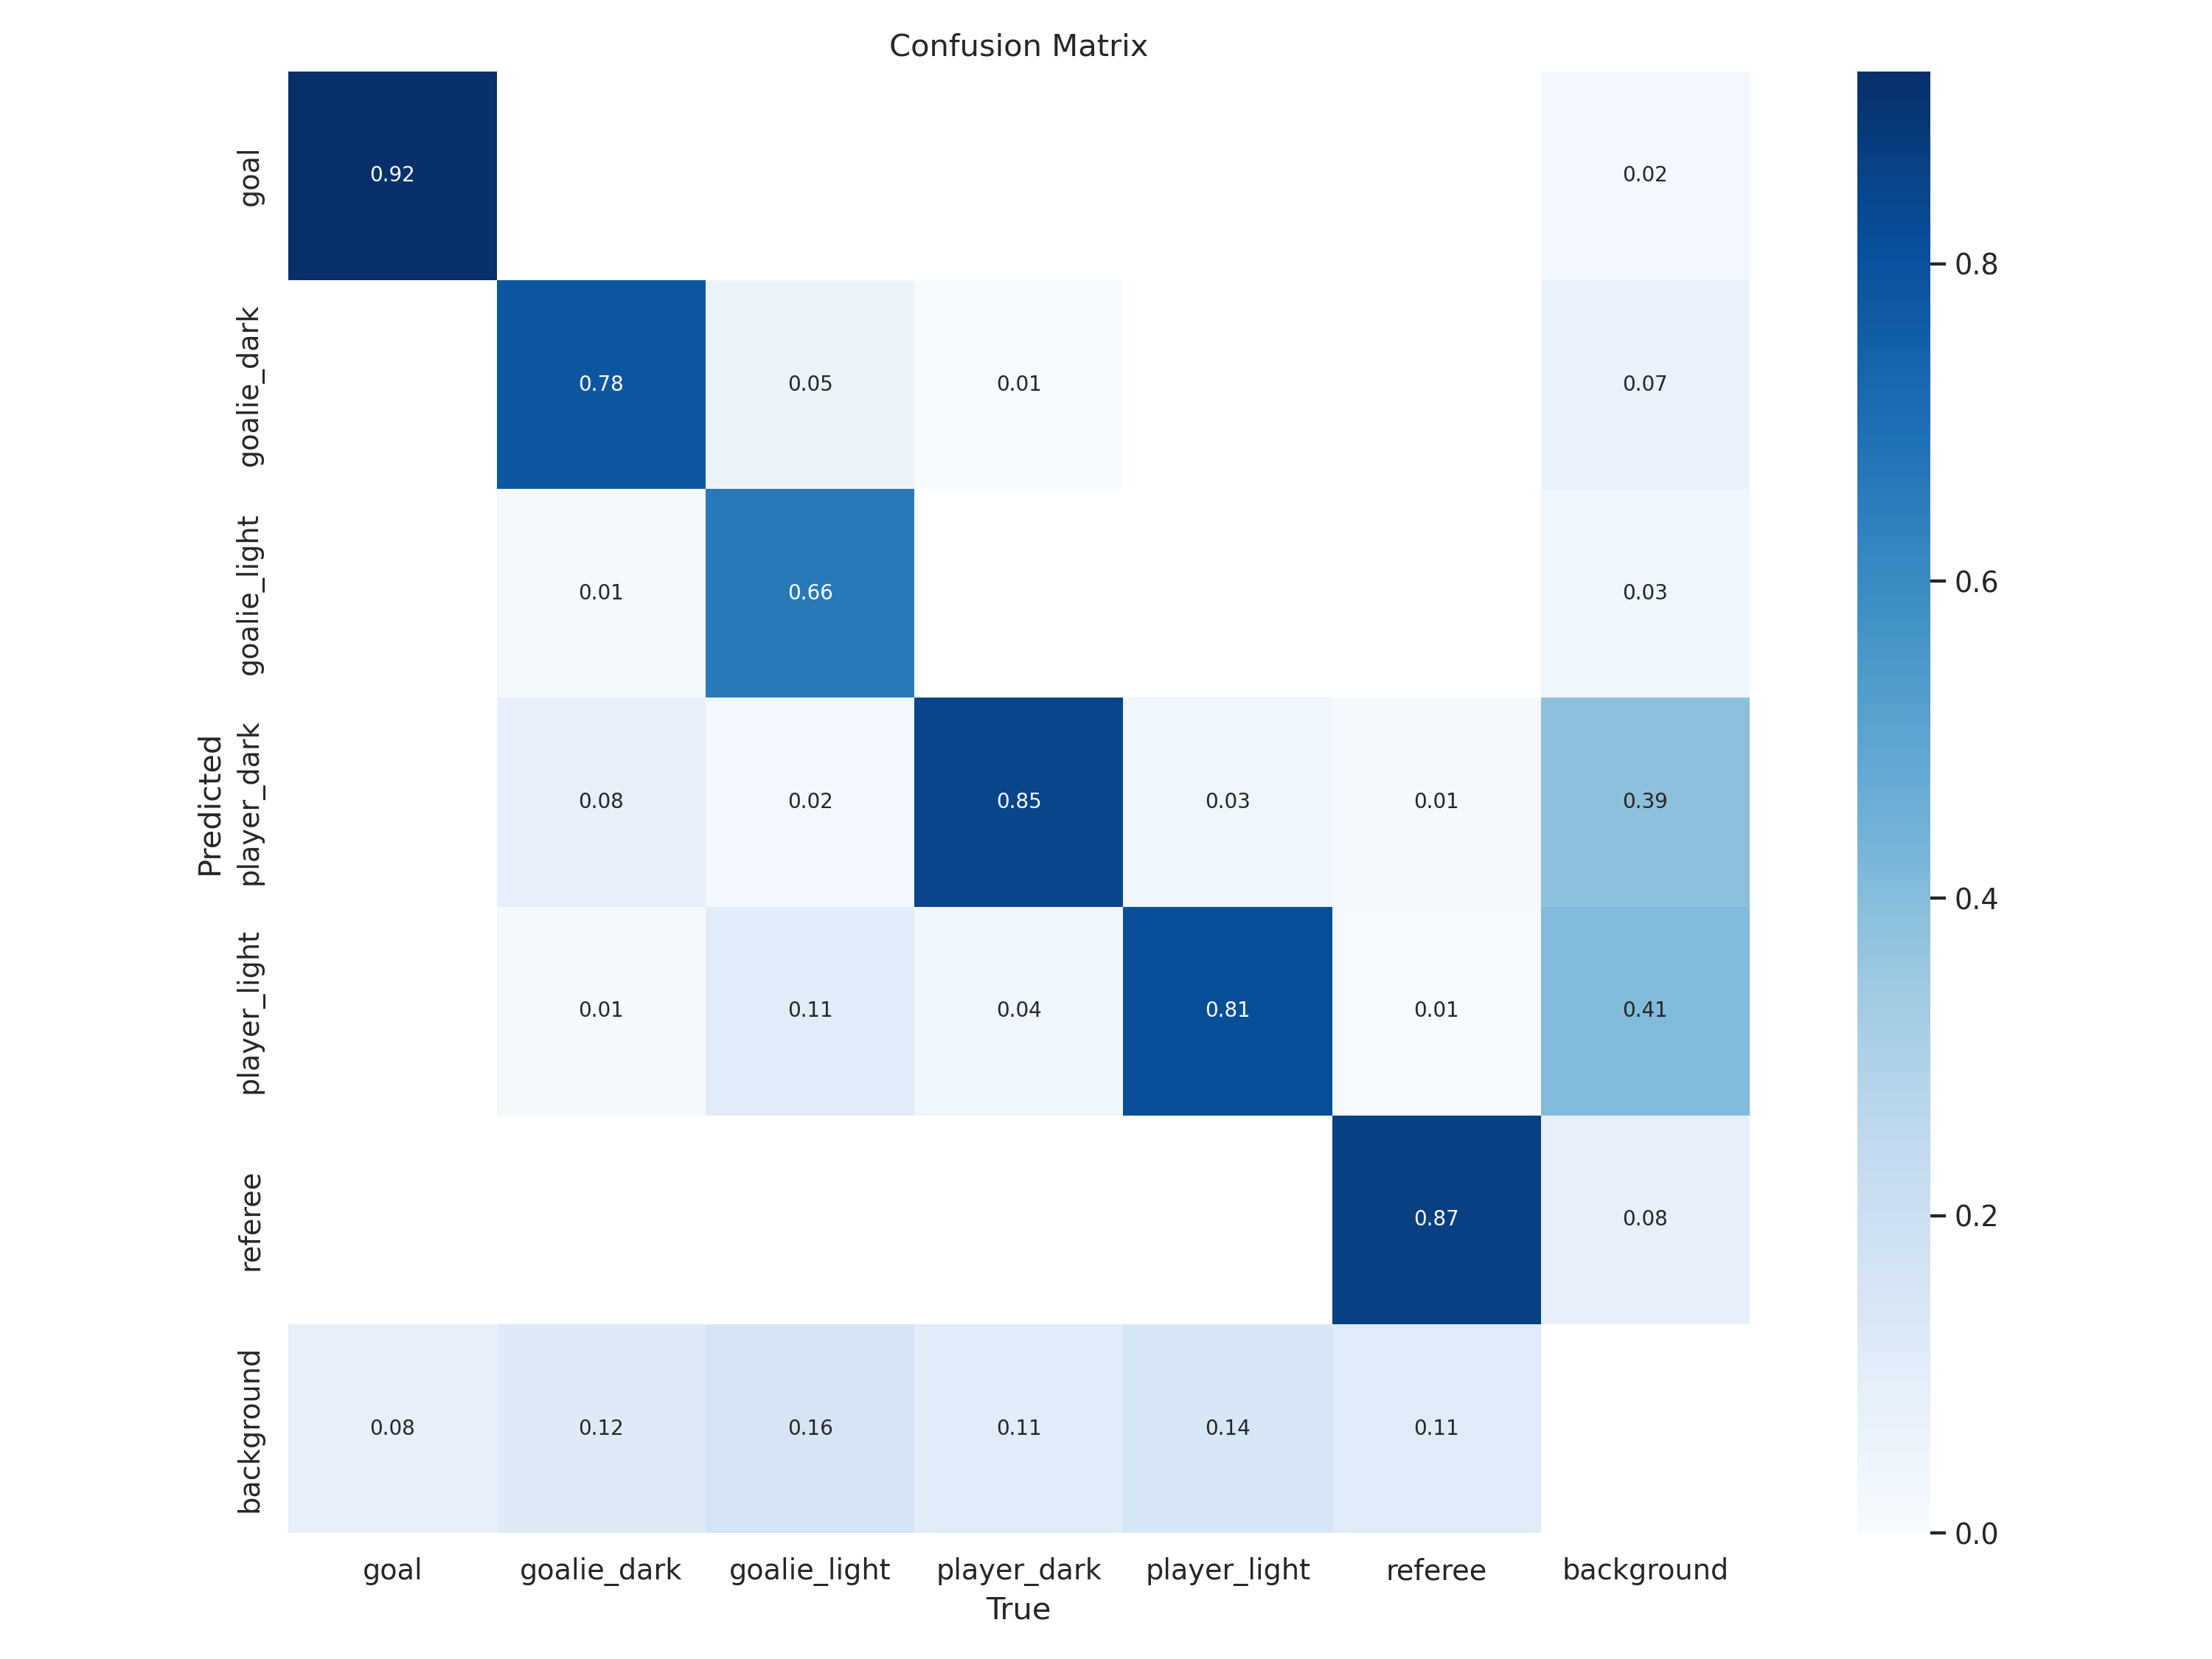

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/confusion_matrix.png', width=1200)

/home/ec2-user/notebooks


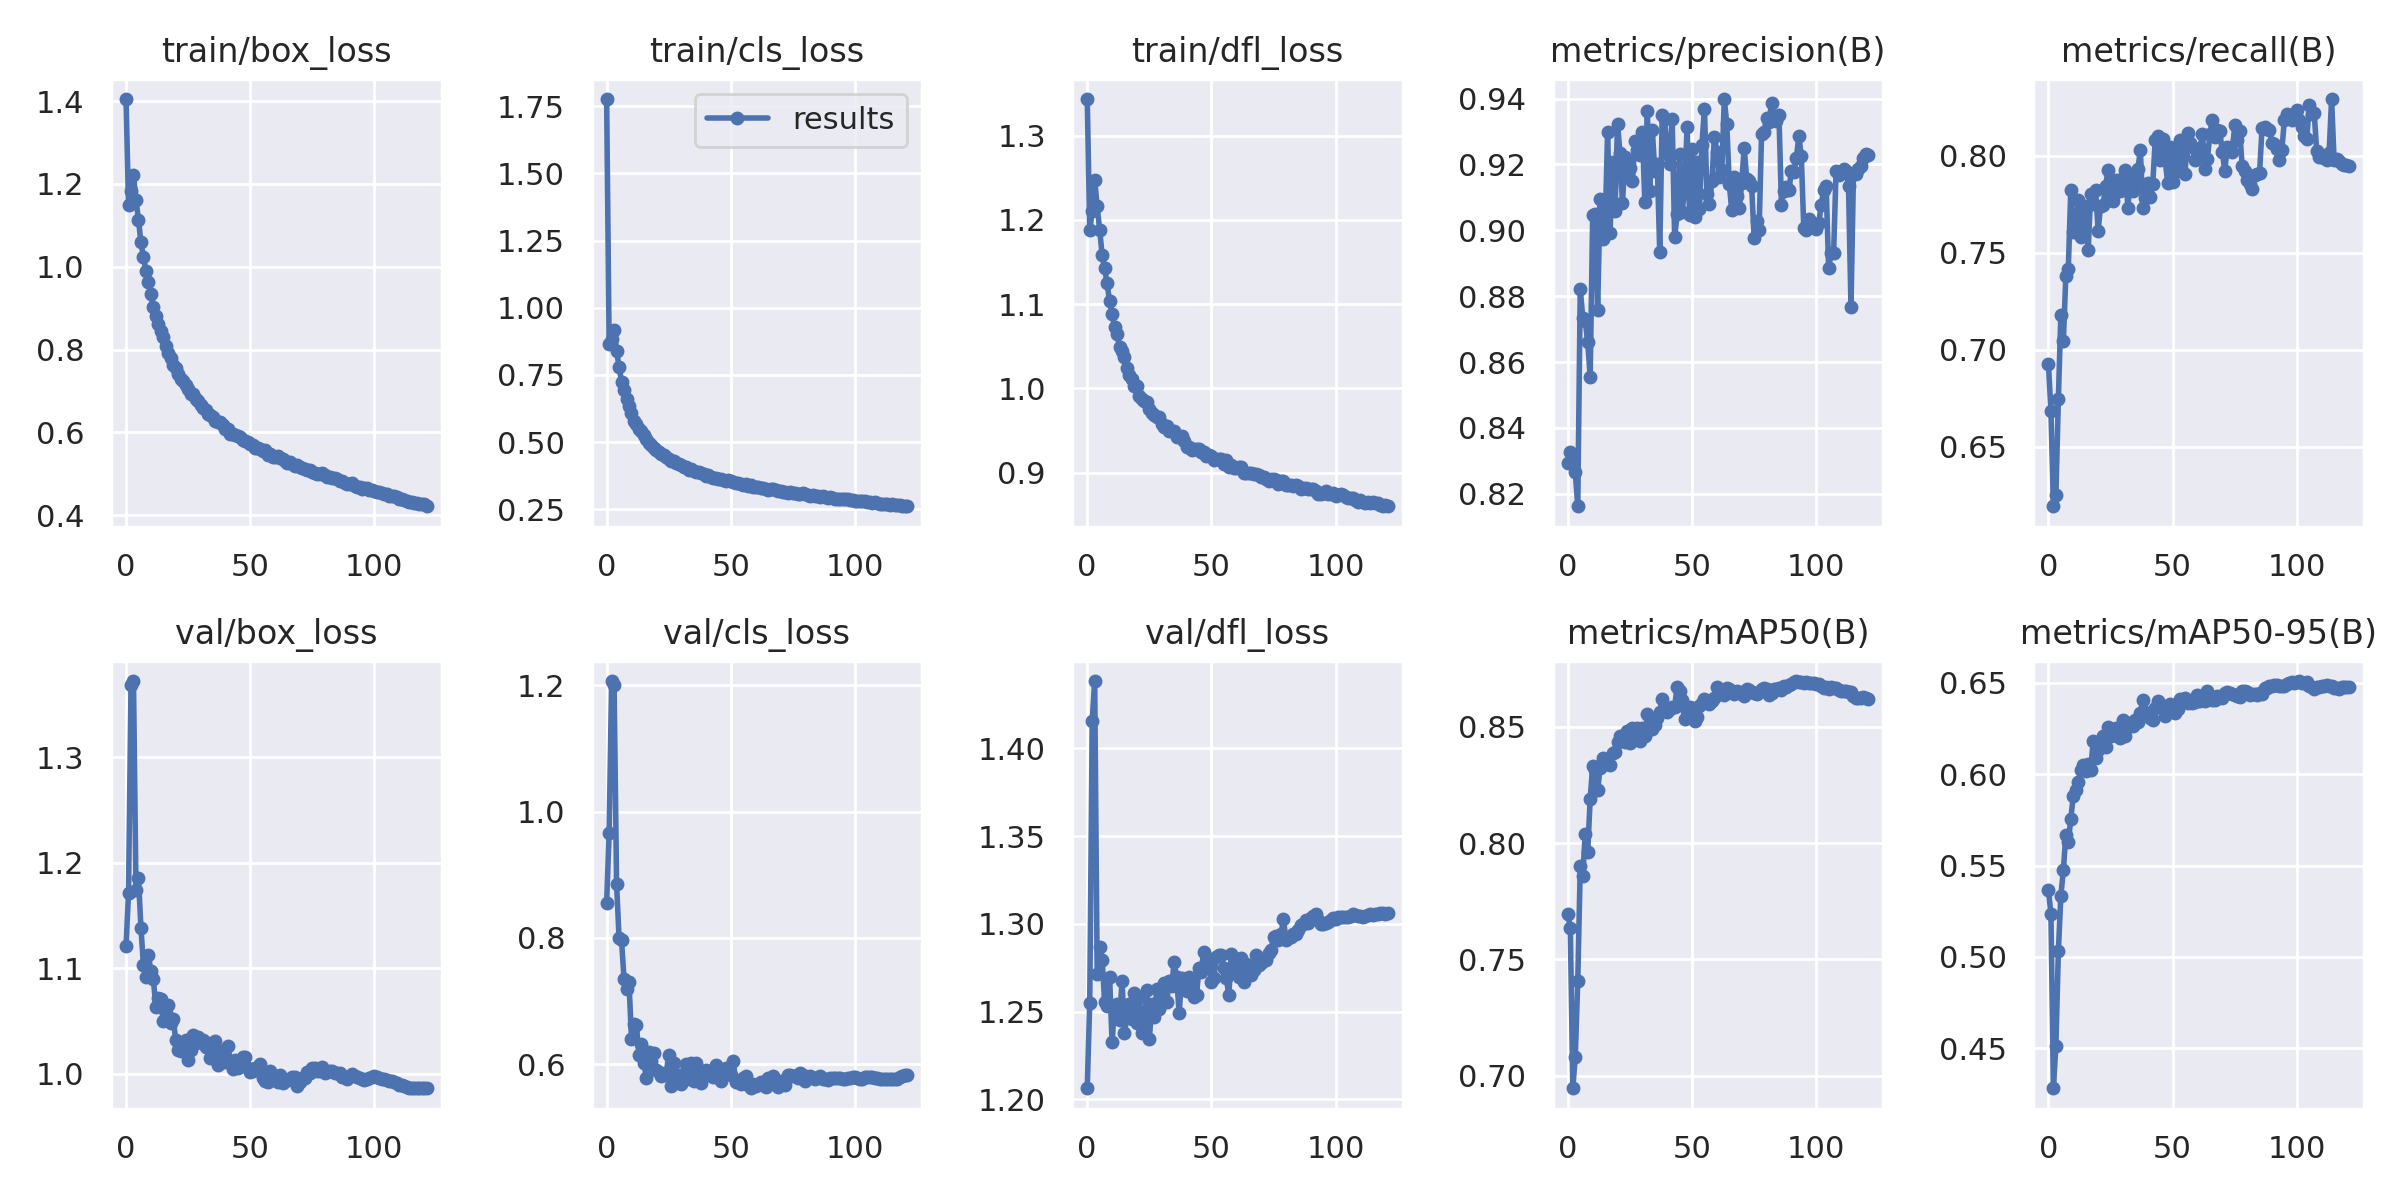

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/results.png', width=1200)

/home/ec2-user/notebooks


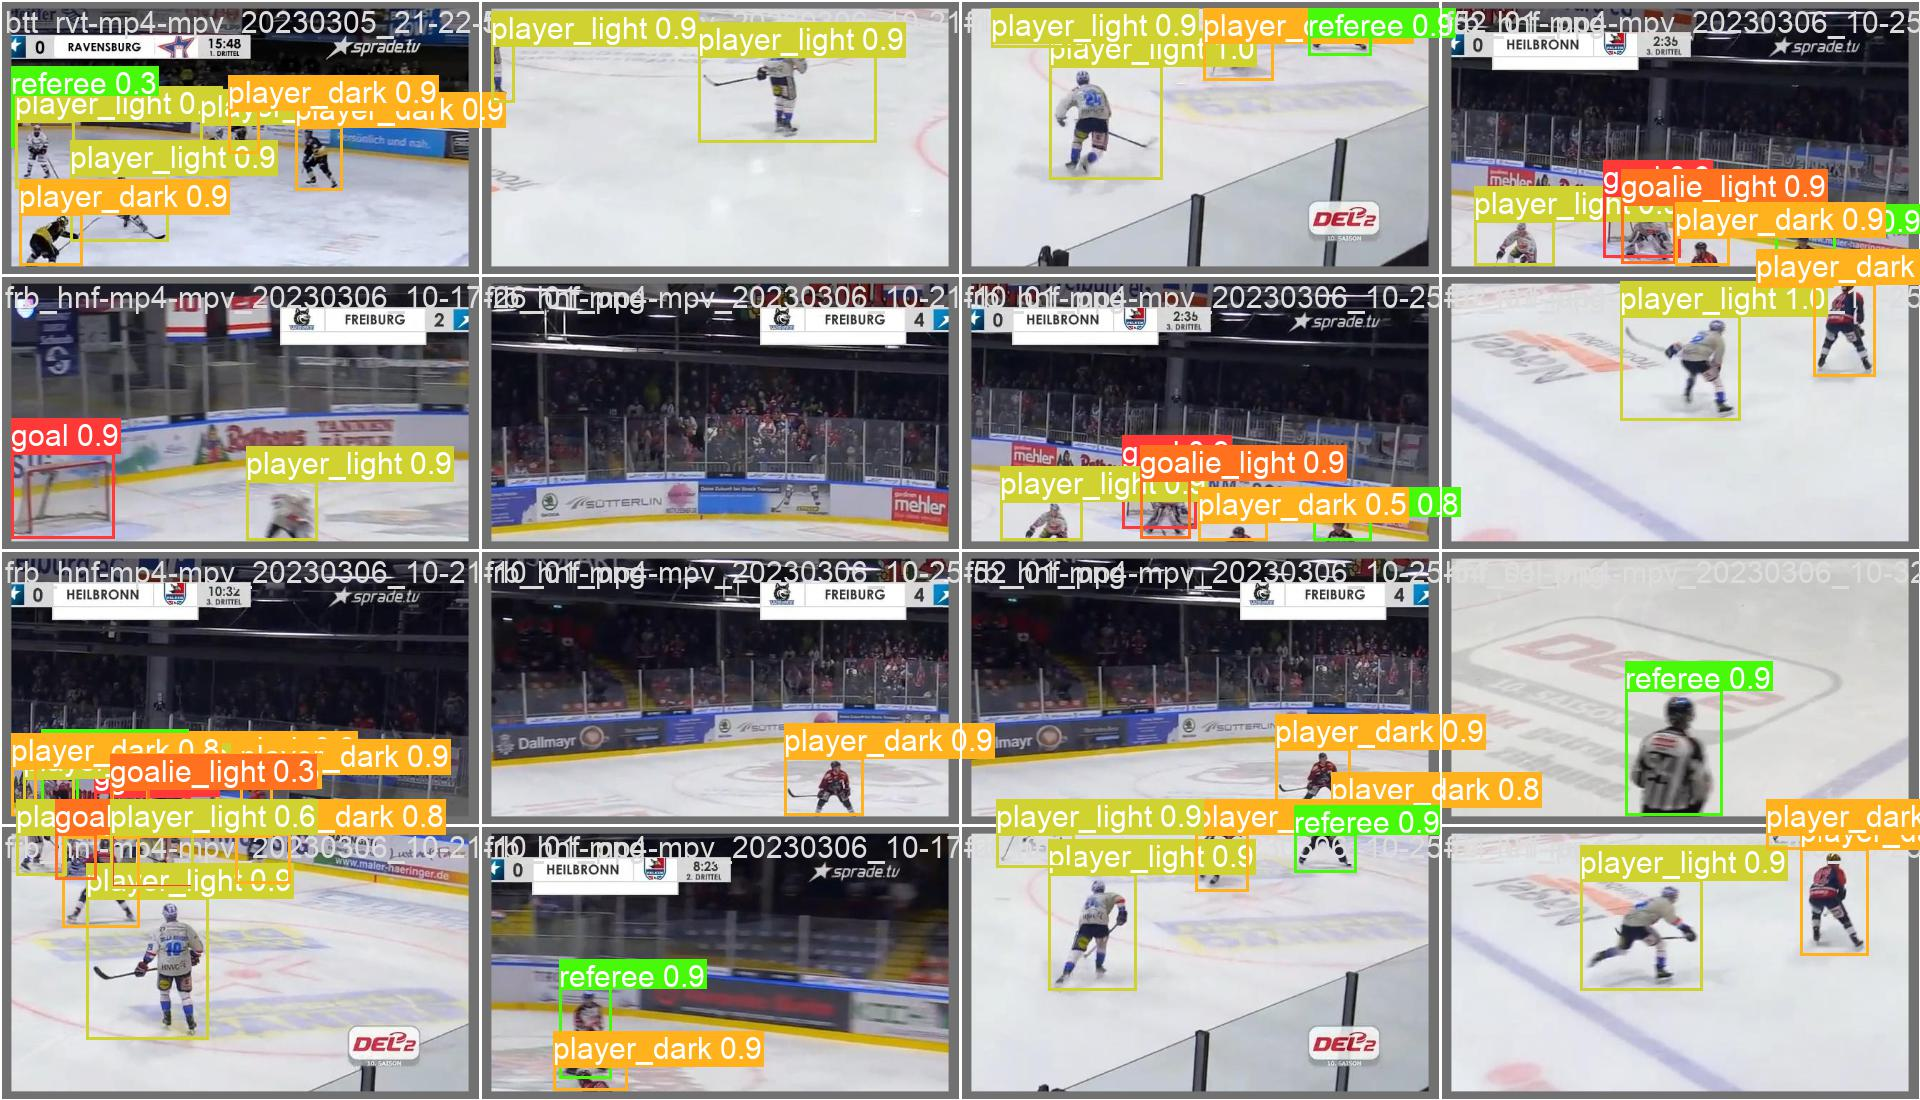

In [14]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/val_batch0_pred.jpg', width=1200)

## Validate Custom Model

In [15]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train4/weights/best.pt data={dataset.location}/data.yaml

/home/ec2-user/notebooks
Ultralytics YOLOv8.0.53 🚀 Python-3.9.13 torch-1.13.1+cu117 CUDA:0 (NVIDIA A10G, 22592MiB)
Model summary (fused): 218 layers, 25843234 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /home/ec2-user/notebooks/datasets/deep-hockey-16/valid/labels.cach
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        580       2295      0.902      0.819      0.869      0.652
                  goal        580        165      0.993      0.907      0.944      0.787
           goalie_dark        580         78       0.81      0.821      0.849      0.632
          goalie_light        580         95      0.915      0.682      0.786      0.567
           player_dark        580        784      0.881      0.833      0.887      0.642
          player_light        580        903      0.889      0.807      0.858      0.613
               referee        580        270      0.924      0.863      0.889      0.671
Speed: 0.2ms prepro

## Inference with Custom Model

In [17]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train4/weights/best.pt conf=0.3 source={dataset.location}/test/images save=True

/home/ec2-user/notebooks
WARNING ⚠️ 'data' is missing. Using default 'data=coco128.yaml'.
Ultralytics YOLOv8.0.53 🚀 Python-3.9.13 torch-1.13.1+cu117 CUDA:0 (NVIDIA A10G, 22592MiB)
Model summary (fused): 218 layers, 25843234 parameters, 0 gradients, 78.7 GFLOPs

Dataset 'coco128.yaml' images not found ⚠️, missing paths ['/home/ec2-user/notebooks/datasets/coco128/images/train2017']
100%|██████████████████████████████████████| 6.66M/6.66M [00:00<00:00, 68.1MB/s]
Unzipping /home/ec2-user/notebooks/datasets/coco128.zip to /home/ec2-user/notebooks/datasets...
Dataset download success ✅ (0.7s), saved to /home/ec2-user/notebooks/datasets

val: Scanning /home/ec2-user/notebooks/datasets/coco128/labels/train2017... 126 
val: New cache created: /home/ec2-user/notebooks/datasets/coco128/labels/train2017.cache
                 Class     Images  Instances      Box(P          R      mAP50  m
Traceback (most recent call last):
  File "/home/ec2-user/anaconda3/bin/yolo", line 8, in <module>
    sys.exi

**NOTE:** Let's take a look at few results.

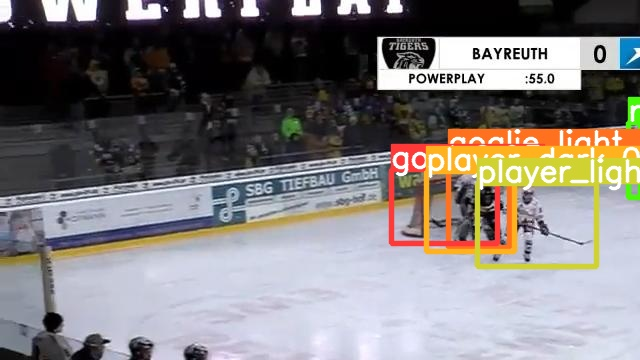

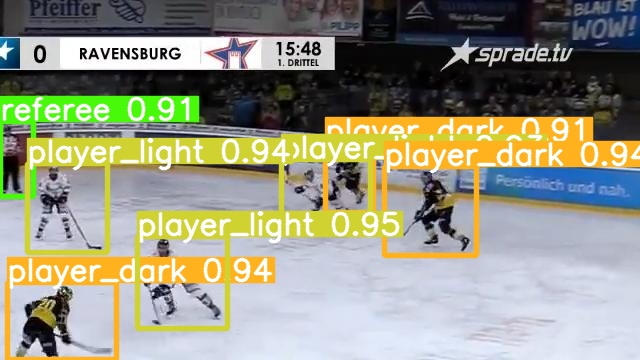

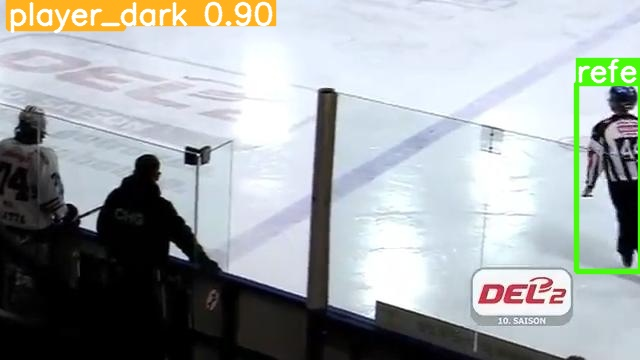

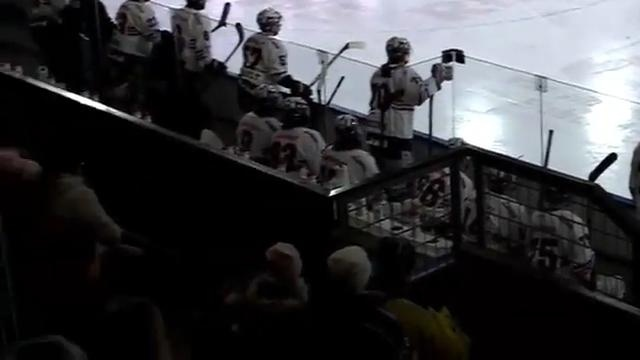

In [18]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict4/*.jpg')[:4]:
      display(Image(filename=image_path, width=640))
      print("\n")

## Deploy model on Roboflow

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [19]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train4/")

Dependency ultralytics<=8.0.20 is required but found version=8.0.53, to fix: `pip install ultralytics<=8.0.20`
View the status of your deployment at: https://app.roboflow.com/spicedfinal/deep-hockey/deploy/16
Share your model with the world at: https://universe.roboflow.com/spicedfinal/deep-hockey/model/16


In [ ]:
#While your deployment is processing, checkout the deployment docs to take your model to most destinations https://docs.roboflow.com/inference

In [ ]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

## 🏆 Congratulations

### Learning Resources

Roboflow has produced many resources that you may find interesting as you advance your knowledge of computer vision:

- [Roboflow Notebooks](https://github.com/roboflow/notebooks): A repository of over 20 notebooks that walk through how to train custom models with a range of model types, from YOLOv7 to SegFormer.
- [Roboflow YouTube](https://www.youtube.com/c/Roboflow): Our library of videos featuring deep dives into the latest in computer vision, detailed tutorials that accompany our notebooks, and more.
- [Roboflow Discuss](https://discuss.roboflow.com/): Have a question about how to do something on Roboflow? Ask your question on our discussion forum.
- [Roboflow Models](https://roboflow.com): Learn about state-of-the-art models and their performance. Find links and tutorials to guide your learning.

### Convert data formats

Roboflow provides free utilities to convert data between dozens of popular computer vision formats. Check out [Roboflow Formats](https://roboflow.com/formats) to find tutorials on how to convert data between formats in a few clicks.

### Connect computer vision to your project logic

[Roboflow Templates](https://roboflow.com/templates) is a public gallery of code snippets that you can use to connect computer vision to your project logic. Code snippets range from sending emails after inference to measuring object distance between detections.